# 1. Importing the required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")


### Importing the CSV data as Panda DataFrame

In [3]:
df = pd.read_csv('stud.csv')

#### Showing the top 5 Records

In [4]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
# Informtion about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
# Checking the shape of the dataset
df.shape

(6607, 20)

In [7]:
# Checking the null values in the dataset
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [8]:
# Checking the Unique values in the dataset
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [9]:
# Checking the duplicate values in the dataset
df.duplicated().sum()

np.int64(0)

# 2. Preprocessing of Data For MODEL

#### 2.1 Checking and Filling the null Values in Data

In [10]:
# Checking the null values in the dataset
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [11]:
# Filling the Categorical Feature null values with Mode
df['Teacher_Quality'] = df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df['Distance_from_Home'] = df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0])


In [12]:
# Displaying the no. of  Numnerical and Categorical 
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Printing the features
print("Printing the total number of Cat and Num featues that we have in our DATASET")
print(" We have {} numerical featues: {}".format(len(numerical_features),numerical_features))
print(" We have {} categorical features: {}".format(len(categorical_features),categorical_features))

Printing the total number of Cat and Num featues that we have in our DATASET
 We have 7 numerical featues: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
 We have 13 categorical features: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


#### 2.2 Separating the data in X & Y Format

In [13]:
x = df.drop('Exam_Score',axis=1)
y = df['Exam_Score']



# MODEL  Building

In [14]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


num_features = x_train.select_dtypes(exclude=['object']).columns

Q1 = x_train[num_features].quantile(0.25)
Q3 = x_train[num_features].quantile(0.75)
IQR = Q3 - Q1

x_train[num_features] = np.where(
    x_train[num_features] > Q3 + 1.5*IQR, Q3 + 1.5*IQR,
    np.where(x_train[num_features] < Q1 - 1.5*IQR, Q1 - 1.5*IQR, x_train[num_features])
)

x_test[num_features] = np.where(
    x_test[num_features] > Q3 + 1.5*IQR, Q3 + 1.5*IQR,
    np.where(x_test[num_features] < Q1 - 1.5*IQR, Q1 - 1.5*IQR, x_test[num_features])
)

# 4️ Handle Rare Categorical Levels
cat_features = x_train.select_dtypes(include=['object']).columns
threshold = 10

for col in cat_features:
    counts = x_train[col].value_counts()
    rare = counts[counts < threshold].index
    x_train[col] = x_train[col].replace(rare, 'Other')
    x_test[col] = x_test[col].replace(rare, 'Other')

# 5️ Preprocessing Pipeline
preprocessor = ColumnTransformer([
    ('num', RobustScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])
# Transform data
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.transform(x_test)

# Feature names after preprocessing
feature_names_transformed = np.concatenate([
    preprocessor.named_transformers_['num'].get_feature_names_out(num_features),
    preprocessor.named_transformers_['cat'].get_feature_names_out(cat_features)
])

x_train_df = pd.DataFrame(x_train_transformed, columns=feature_names_transformed, index=x_train.index)
x_test_df = pd.DataFrame(x_test_transformed, columns=feature_names_transformed, index=x_test.index)

# Interaction features
x_train_df['Attendance_Hours'] = x_train_df['Attendance'] * x_train_df['Hours_Studied']
x_test_df['Attendance_Hours'] = x_test_df['Attendance'] * x_test_df['Hours_Studied']

x_train_df['Sleep_Activity'] = x_train_df['Sleep_Hours'] * x_train_df['Physical_Activity']
x_test_df['Sleep_Activity'] = x_test_df['Sleep_Hours'] * x_test_df['Physical_Activity']

x_train_df['Previous_Tutoring'] = x_train_df['Previous_Scores'] * x_train_df['Tutoring_Sessions']
x_test_df['Previous_Tutoring'] = x_test_df['Previous_Scores'] * x_test_df['Tutoring_Sessions']

xgb_model = XGBRegressor(
    n_estimators=400,
    max_depth=3,
    learning_rate=0.07,
    subsample=0.7,
    colsample_bytree=0.6,
    reg_alpha=0.3,
    reg_lambda=1.0,
    random_state=42
)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
)
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb_model),
        ('rf', rf_model),
        ('lgb', lgb_model)
    ],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1,
    passthrough=True
)

stacking_model.fit(x_train_df, y_train)
y_train_pred = stacking_model.predict(x_train_df)
y_test_pred = stacking_model.predict(x_test_df)

print("Train R2:", r2_score(y_train, y_train_pred)*100)
print("Test R2:", r2_score(y_test, y_test_pred)*100)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_model, x_train_df, y_train, cv=kf, scoring='r2')
print("Mean CV R²:", cv_scores.mean()*100)

Train R2: 71.56114391640183
Test R2: 76.82056150620038
Mean CV R²: 71.47501141359254


#### Create an Evaluate Funtion to give all metrics after model Training

In [15]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2 = r2_score(true,predicted)
    return mae,mse,r2

In [16]:
models = {
    "Lineaar Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),   
    "kNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),   
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),  
    "Catboost": CatBoostRegressor(),
    "Adaboost": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train_df, y_train)
    y_train_pred = model.predict(x_train_df)
    y_test_pred = model.predict(x_test_df)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model performance on Training set")
    print("Root Mean Squared Error is {}".format(model_train_rmse))
    print("Mean Absolute Error is {}".format(model_train_mae))
    print("R2 Score is {}".format(model_train_r2))
    print("\n")

    print("Model performance on Test set")
    print("Root Mean Squared Error is {}".format(model_test_rmse)) 
    print("Mean Absolute Error is {}".format(model_test_mae))
    print("R2 Score is {}".format(model_test_r2))
    r2_list.append(model_test_r2)
 
    print('='*35)
    print('\n')

Lineaar Regression
Model performance on Training set
Root Mean Squared Error is 4.353099339666817
Mean Absolute Error is 0.5165686245685498
R2 Score is 0.7169813513845169


Model performance on Test set
Root Mean Squared Error is 3.278109375392932
Mean Absolute Error is 0.47216894910053525
R2 Score is 0.7680868363680728


Lasso
Model performance on Training set
Root Mean Squared Error is 12.08566365488141
Mean Absolute Error is 2.413693143076353
R2 Score is 0.21424531619175102


Model performance on Test set
Root Mean Squared Error is 10.806639812975925
Mean Absolute Error is 2.3745488414668365
R2 Score is 0.23547333531005887


Ridge
Model performance on Training set
Root Mean Squared Error is 4.353103097748661
Mean Absolute Error is 0.5165814513156771
R2 Score is 0.7169811070511898


Model performance on Test set
Root Mean Squared Error is 3.2779753481303797
Mean Absolute Error is 0.4721106819325985
R2 Score is 0.7680963182623333


kNN
Model performance on Training set
Root Mean Squar

In [17]:
pd.DataFrame({'Model':model_list,'R2_Score':r2_list}).sort_values(by='R2_Score',ascending=False)

,Model,R2_Score
2,Ridge,0.768096
0,Lineaar Regression,0.768087
7,Catboost,0.736816
5,Random Forest,0.658856
6,XGBoost,0.655230
3,kNN,0.452088
1,Lasso,0.235473
4,Decision Tree,0.167744
8,Adaboost,-0.639996


### Linear Regression

In [18]:
lnr_model = LinearRegression()
lnr_model.fit(x_train_df, y_train)
y_pred = lnr_model.predict(x_test_df)
score = r2_score(y_test, y_pred)*100
print("Accuracy of Linear Regression is: %.2f" %score)


Accuracy of Linear Regression is: 76.81


#### Plotting between y_pred and y_test

Text(0.5, 1.0, 'Actual vs Predicted Exam Scores')

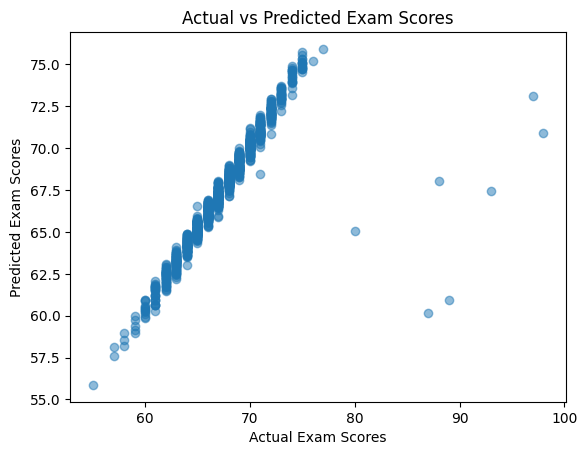

In [19]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Exam Scores")    
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted Exam Scores")

<Axes: xlabel='Exam_Score'>

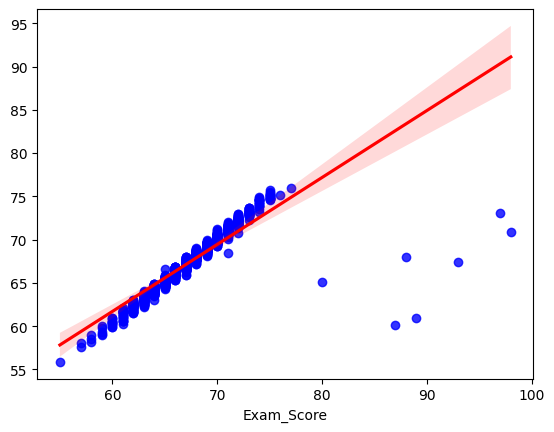

In [20]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [21]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_test - y_pred})
pred_df

,Actual,Predicted,Difference
743,65,64.538400,0.461600
5551,65,65.300554,-0.300554
3442,71,71.542184,-0.542184
6571,64,64.147336,-0.147336
4204,66,66.620443,-0.620443
...,...,...,...
4709,69,68.779070,0.220930
3664,72,72.472913,-0.472913
5231,66,66.149872,-0.149872
1773,63,63.454531,-0.454531


In [22]:
x_train.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
5810,27.0,79.0,Low,High,Yes,8.0,63.0,High,Yes,2.0,Low,Medium,Public,Negative,5.0,No,College,Moderate,Female
1268,16.0,86.0,High,Medium,Yes,7.0,94.0,Medium,Yes,2.0,Low,High,Public,Neutral,3.0,No,High School,Moderate,Female
414,22.0,87.0,Low,Medium,No,8.0,83.0,Low,Yes,1.0,Low,Medium,Public,Neutral,1.0,No,College,Far,Male


In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(x_train_df, y_train)

# Get feature importances
importances = model.feature_importances_

# Put into DataFrame
feat_importance = pd.DataFrame({
    "Feature": x_train_df.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


print((feat_importance*100).round(2))



                                              Feature  Importance
1   AttendanceAttendanceAttendanceAttendanceAttend...       31.89
40  Attendance_HoursAttendance_HoursAttendance_Hou...       22.06
0   Hours_StudiedHours_StudiedHours_StudiedHours_S...        8.31
3   Previous_ScoresPrevious_ScoresPrevious_ScoresP...        7.03
42  Previous_TutoringPrevious_TutoringPrevious_Tut...        3.95
2   Sleep_HoursSleep_HoursSleep_HoursSleep_HoursSl...        1.93
5   Physical_ActivityPhysical_ActivityPhysical_Act...        1.85
9   Access_to_Resources_HighAccess_to_Resources_Hi...        1.85
6   Parental_Involvement_HighParental_Involvement_...        1.82
4   Tutoring_SessionsTutoring_SessionsTutoring_Ses...        1.79
41  Sleep_ActivitySleep_ActivitySleep_ActivitySlee...        1.77
7   Parental_Involvement_LowParental_Involvement_L...        1.21
10  Access_to_Resources_LowAccess_to_Resources_Low...        1.00
34  Parental_Education_Level_PostgraduateParental_...        0.87
19  Family

In [24]:
x_train['Tutoring_Sessions'].value_counts()

Tutoring_Sessions
1.0    1737
2.0    1329
0.0    1203
3.0     667
3.5     349
Name: count, dtype: int64

In [25]:
for i in x_train.columns:
    print(i)

Hours_Studied
Attendance
Parental_Involvement
Access_to_Resources
Extracurricular_Activities
Sleep_Hours
Previous_Scores
Motivation_Level
Internet_Access
Tutoring_Sessions
Family_Income
Teacher_Quality
School_Type
Peer_Influence
Physical_Activity
Learning_Disabilities
Parental_Education_Level
Distance_from_Home
Gender
